# Working with Keras: A Deep Dive

### Loading Libraries

In [57]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

# TensorFlow Datasets
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import imdb
from tensorflow.keras.datasets import reuters
from tensorflow.keras.datasets import boston_housing

# Math Computing
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt

# Operating System
import os

### Different Ways to Build Keras Models

In [2]:
# Model set-up
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [3]:
# Incrementally building a Sequential Model, as follow:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [4]:
# Models that aren't yet built have no weights
# model.weights

In [5]:
# Calling a model for the first time to build it
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.16905174,  0.07509637, -0.2743699 , -0.20125604, -0.18531738,
          0.24571848, -0.20769536,  0.19432941,  0.1492188 , -0.06116922,
         -0.15800145,  0.291407  ,  0.1451363 ,  0.11636773,  0.10895565,
         -0.23730326,  0.15397188, -0.29870522, -0.03154033,  0.1695103 ,
         -0.04426622,  0.03529584, -0.0277642 ,  0.09070021,  0.06609991,
         -0.29268014,  0.1830833 ,  0.10581988, -0.2457346 , -0.15698533,
         -0.01996851, -0.2617976 ,  0.08522123, -0.19763416, -0.08481696,
          0.20392495, -0.02391517,  0.08546808,  0.21561074,  0.14117217,
          0.22907072,  0.05827788,  0.2832548 , -0.17053683,  0.08180138,
          0.04420343,  0.25157577,  0.17625734, -0.00937778,  0.26003897,
          0.03713563,  0.21684045, -0.17196321, -0.162794  ,  0.11438841,
          0.1896902 , -0.27227005, -0.18761805,  0.07123449, -0.17816238,
         -0.13168167,  0.22587311,  0.00640

In [6]:
# The summary() method
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Naming models
model = keras.Sequential(name="First_model")
model.add(layers.Dense(64, activation="relu", name="First_layer"))
model.add(layers.Dense(10, activation="softmax", name="Last_layer"))
model.build((None, 3))
model.summary()

Model: "First_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_layer (Dense)         (None, 64)                256       
                                                                 
 Last_layer (Dense)          (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Specifying the input shape of your model in advance
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256 (1.00 KB)
Trainable params: 256 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### The Functional API

#### A simple example

In [11]:
# A simple Functional model with two Dense layers
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu") (inputs)
outputs = layers.Dense(10, activation="softmax") (features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [12]:
inputs.shape

TensorShape([None, 3])

In [13]:
inputs.dtype

tf.float32

In [14]:
features = layers.Dense(64, activation="relu") (inputs)

In [15]:
features.shape

TensorShape([None, 64])

In [16]:
outputs = layers.Dense(10, activation="softmax") (features)

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Multi-input, Multi-output models

In [18]:
# A multi-input, multi-output Function model, as follow:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate() ([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority") (features)
department = layers.Dense(
    num_departments, activation="softmax", name="department") (features)

model = keras.Model(inputs=[title, text_body, tags],
                    outputs=[priority, department])

#### Training a Multi-input, Multi-output model

In [19]:
# Training a model by providing list of input and targets arrays 
num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 862us/step


In [20]:
# Training a model providing dicts of input and target arrays
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 883us/step


#### The ower of the Functional API: Access to layer connectivity

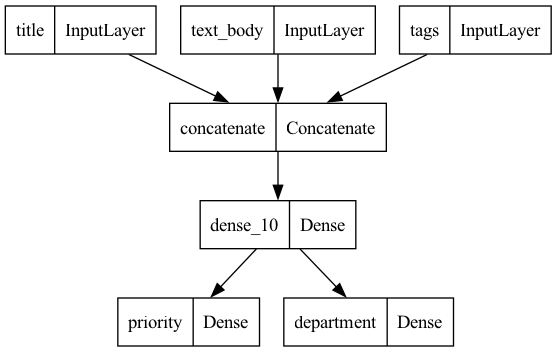

In [21]:
#
keras.utils.plot_model(model, "ticket_classifier.png")

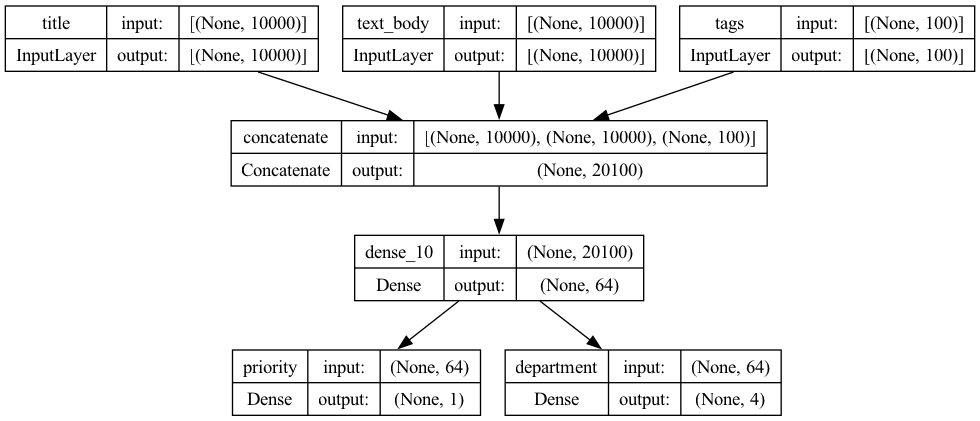

In [22]:
keras.utils.plot_model(
    model, "ticket_classifier_with_shape_info.png", show_shapes=True)

In [23]:
# Retrieving the inputs or outputs of a layer in a Functional model
model.layers

In [24]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [26]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

In [27]:
# Creating a new model by reusing intermediate layer outputs
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

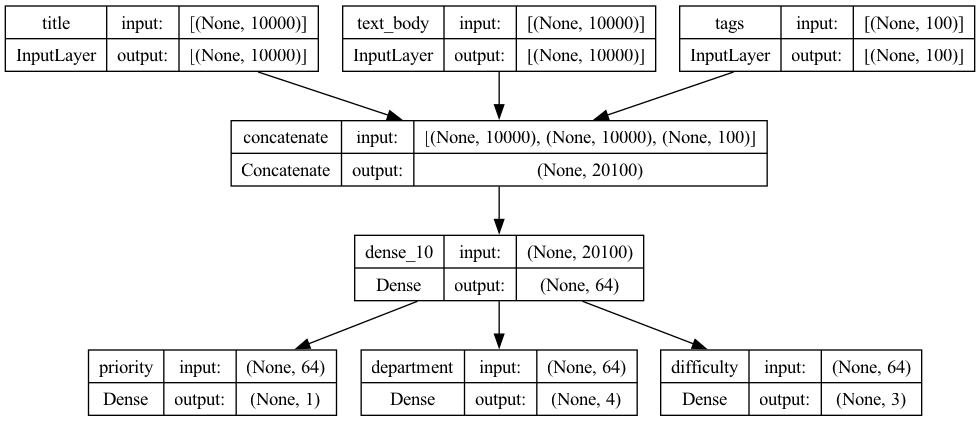

In [28]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

#### Subclassing The Model Class

In [29]:
# A simple subclassed model
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [30]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [31]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 0s 1ms/step


#### Mixing & matching different components

In [33]:
# Creating a Functional model that includes a subclassed model
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [34]:
# Creating a subclassed model that includes a Functional model
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

### Using built-in Training & Evaluation Loops

In [35]:
# The standard workflow:
def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()

images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))

test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2930 - accuracy: 0.9140 - val_loss: 0.1452 - val_accuracy: 0.9584
Epoch 2/3
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1656 - accuracy: 0.9541 - val_loss: 0.1210 - val_accuracy: 0.9683
Epoch 3/3
313/313 [==============================] - 0s 333us/step


#### Writing your own metrics

In [36]:
# Implementing a custom metric by subclassing the Metric class

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [37]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2964 - accuracy: 0.9118 - rmse: 7.1816 - val_loss: 0.1613 - val_accuracy: 0.9539 - val_rmse: 7.3526
Epoch 2/3
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1679 - accuracy: 0.9539 - rmse: 7.3559 - val_loss: 0.1244 - val_accuracy: 0.9672 - val_rmse: 7.3981
Epoch 3/3
313/313 [==============================] - 0s 382us/step - loss: 0.1089 - accuracy: 0.9700 - rmse: 7.4245


#### Using Callbacks

In [38]:
keras.callbacks.ModelCheckpoint
keras.callbacks.EarlyStopping
keras.callbacks.LearningRateScheduler
keras.callbacks.ReduceLROnPlateau
keras.callbacks.CSVLogger

keras.src.callbacks.CSVLogger

#### The EarlyStopping & ModelCheckpoint callbacks

In [39]:
# Using the callbacks argument in the fit() method
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2952 - accuracy: 0.9126 - val_loss: 0.1535 - val_accuracy: 0.9583
Epoch 2/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1645 - accuracy: 0.9530 - val_loss: 0.1246 - val_accuracy: 0.9666
Epoch 3/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1391 - accuracy: 0.9628 - val_loss: 0.1201 - val_accuracy: 0.9687
Epoch 4/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1252 - accuracy: 0.9672 - val_loss: 0.1084 - val_accuracy: 0.9748
Epoch 5/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1149 - accuracy: 0.9701 - val_loss: 0.1080 - val_accuracy: 0.9754
Epoch 6/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1097 - accuracy: 0.9730 - val_loss: 0.1128 - val_accuracy: 0.9759
Epoch 7/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1062 - accuracy: 0.9740 - val_loss: 0.1172 - val_accuracy:

In [40]:
model = keras.models.load_model("checkpoint_path.keras")

#### Writing your own callbacks

In [45]:
# Creating a custom callback by subclassing the Callback class
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2948 - accuracy: 0.9126 - val_loss: 0.1611 - val_accuracy: 0.9516
Epoch 2/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1667 - accuracy: 0.9539 - val_loss: 0.1251 - val_accuracy: 0.9659
Epoch 3/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1380 - accuracy: 0.9616 - val_loss: 0.1167 - val_accuracy: 0.9705
Epoch 4/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1257 - accuracy: 0.9672 - val_loss: 0.1111 - val_accuracy: 0.9718
Epoch 5/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1170 - accuracy: 0.9700 - val_loss: 0.1028 - val_accuracy: 0.9763
Epoch 6/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1140 - accuracy: 0.9714 - val_loss: 0.0951 - val_accuracy: 0.9794
Epoch 7/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1057 - accuracy: 0.9746 - val_loss: 0.1133 - val_accuracy:

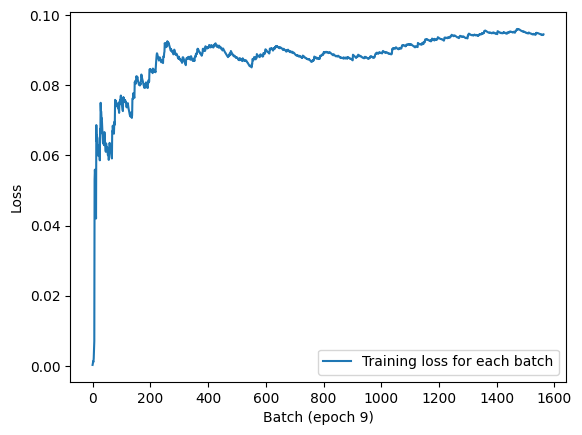

In [46]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

#### Monitoring & Visualization with TensorBoard

In [52]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="/Users/isisromero/logs",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2934 - accuracy: 0.9130 - val_loss: 0.1500 - val_accuracy: 0.9577
Epoch 2/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1618 - accuracy: 0.9540 - val_loss: 0.1273 - val_accuracy: 0.9667
Epoch 3/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1387 - accuracy: 0.9624 - val_loss: 0.1152 - val_accuracy: 0.9723
Epoch 4/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1262 - accuracy: 0.9670 - val_loss: 0.1137 - val_accuracy: 0.9724
Epoch 5/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1151 - accuracy: 0.9708 - val_loss: 0.1102 - val_accuracy: 0.9750
Epoch 6/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1097 - accuracy: 0.9728 - val_loss: 0.1273 - val_accuracy: 0.9734
Epoch 7/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1064 - accuracy: 0.9743 - val_loss: 0.1175 - val_accuracy:

In [58]:
os.environ['TENSORBOARD_BINARY'] = '/Users/isisromero/anaconda3/envs/ml_env/bin/tensorboard'

In [59]:
%reload_ext tensorboard
%tensorboard --logdir /Users/isisromero/logs

### Writing your own Training and Evaluation Loops

#### Low-level usage of metrics

In [60]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

result: 1.00


In [61]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")

Mean of values: 2.00


#### A complete training and evaluation loop

In [63]:
# Writing a step-by-step training loop: the training step function


model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.legacy.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

In [64]:
# Writing a step-by-step training loop: resetting the metrics
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

In [65]:
# Writing a step-by-step training loop: the loop itself
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

Results at the end of epoch 0
...sparse_categorical_accuracy: 0.9141
...loss: 0.2911
Results at the end of epoch 1
...sparse_categorical_accuracy: 0.9542
...loss: 0.1654
Results at the end of epoch 2
...sparse_categorical_accuracy: 0.9640
...loss: 0.1408


In [66]:
# Writing a step-by-step evaluation loop
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

Evaluation results:
...val_sparse_categorical_accuracy: 0.9666
...val_loss: 0.1297


#### Make it fast with tf.function

In [67]:
# Adding a tf.function decorator to our evaluation-step function
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

Evaluation results:
...val_sparse_categorical_accuracy: 0.9666
...val_loss: 0.1297


#### Leveraging fit() with a custom training loop

In [68]:
# Implementing a custom training step to use with fit()
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [70]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs, outputs)


optimizer = keras.optimizers.legacy.RMSprop()

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=3)


Epoch 1/3
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2954 - accuracy: 0.9120
Epoch 2/3
1563/1563 [==============================] - 2s 998us/step - loss: 0.1678 - accuracy: 0.9522
Epoch 3/3
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1406 - accuracy: 0.9621


In [71]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [73]:

inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs, outputs) 


optimizer = keras.optimizers.legacy.RMSprop()

model.compile(optimizer=optimizer,
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

model.fit(train_images, train_labels, epochs=3)


Epoch 1/3
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2959 - sparse_categorical_accuracy: 0.9123
Epoch 2/3
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1643 - sparse_categorical_accuracy: 0.9529
Epoch 3/3
1563/1563 [==============================] - 2s 990us/step - loss: 0.1363 - sparse_categorical_accuracy: 0.9630
